# CMSC320 Fall 2022 Final Project- Riya Kukadia and Amartya Patel

In [1]:
# Topic: Analysing Water Quality Metrics of several different Water Bodies.

# Contributors: Riya Kukadia (UID: 117260557) and Amartya Patel (UID: 117183986)

# Topic Introduction

First, it is undoubtedly true that access to safe and reliable water is considered as a basic human right. Subsequently, it is extremely essential to have some knowledge about the water we use (especially for consumption) as it can lead to a plethora of health problems! 

Next, in the same vein, we use this insight as motivation to dive deeper and analyze the quality of water (primarily the notion of potability) using different chemical properties (such as pH value, Hardness, Sulfates etc.), thus inspecting the quality of water across different samples.


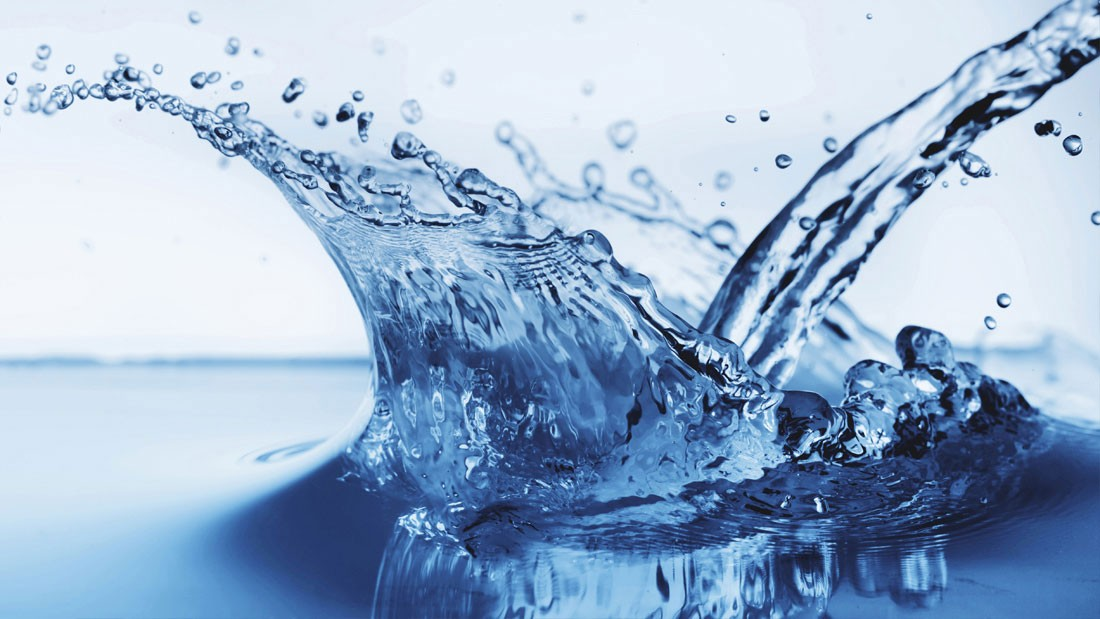

Picture Taken From: https://www.prominent.com/en/Applications/Applications/Water-Treatment-and-Water-Disinfection/Water-Treatment-and-Water-Disinfection.html

#  Now Getting Started!

First and foremost, we simply import necessary libraries and tools, that we might/will need for the completeion of this project.

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import sys
import io

# Step 1: Data Collection/Curation + Parsing (if necessary)

We have obtained this dataset from https://www.kaggle.com/, and have provided the relevant link down below.

Link: https://www.kaggle.com/datasets/adityakadiwal/water-potability

Explaining our Dataset:

The following dataset provides a vivid description of the chemical properties of water (for that sample). These different chemical properties (that is the columns/attributes as part of the dataframe) assist in determining the quality of water, particularly the idea of potability (whether or not it is fit for consumption) of that specific water sample.

Detailed Description for each Column/Attribute:

1) ph: pH stands for potential hydrogen, which essentially tells us the potential of hydrogen in liquids (here in the water      sample). It gives an idea into whether the water is acidic (value less than 7), basic (value greater than 7) or neutral (value of 7).
Ideal Value: 6.52 - 6.83 (max limit: 8.5)

2) Hardness: Hardness here revolves around the mineral content in the water, that is, it focuses on the amount of dissolved calcium and magnesium in the water. 
Ideal Value: should not exceed 120-170 mg/L

3) Solids (Total Dissolved Solids): Solids in this case refer to any minerals, salts, metals, cations or anions dissolved in water (that is any matter that is suspended or dissolved in water).
Ideal Value: 500 mg/L (max: 1000 mg/L)

4) Chloramines: Chloramines (group of chloroids and ammonia) are disinfectants used to treat drinking water. 
Ideal Value: Up to 4 mg/L or 4 ppm

5) Sulfate: Sulphates are chemicals that just naturally make their presence in water. A higher level in sulphates can behave like laxative.
Ideal Value: Lower than 500 mg/L

6) Conductivity: Conductivity is a good measure to check for water quality. This is becasue pure water is a good insulator (not conductor).
Ideal Value: Should not exceed 400 μS/cm

7) Organic_carbon: Organic carbon revolves around the total amount of carbon atoms tied up in the organic compound of the water sample.
Ideal Value: Less than 2 mg/L as TOC for drinking water, and less than 4 mg/L for source water

8) Trihalomethanes:	Total trihalomethanes (TTHM) are a group of disinfection byproducts that form when chlorine compounds that are used to disinfect water react with other naturally occurring chemicals in the water.
Ideal Value: Up to 80 ppm

9) Turbidity: Turbidity basically highlights the physical appeareance of the water, that is, the clarity of the water itself. Particles suspended in the water could make the water seem more cloudy looking.
Ideal Value: 5.00 NTU

10) Potability: This simply means whether or not the water is fit for consumption. 
Ideal Value: 0 means not potable and 1 means potable

Size of the Dataset: 3276 (rows), 10 (columns)

Notes:

1) Information about the metrics used:

ppm: parts per million

μg/L: microgram per litre

mg/L: milligram per litre

NTU: Nephelometric Turbidity Units

2) There exist values for water samples where information for certain atrributes is blank or NaN, Null etc.

3) Since we are using a ready to use dataset, there is no need to parse the data. 

In [19]:
Water_Potability_Data = pd.read_csv('water_potability.csv', low_memory = False)

# Information on the size of the dataset:
Water_Potability_Data.shape

# Concerned dataset:
Water_Potability_Data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# Step 2: Data Management/Representation

It is unequivocally true that the current state of the dataframe has missing data in several of the columns. 

Subsequently in this step we clean the data in our dataframe, for effective data analysis in the rest of the project.

First we can rename the columns to add the metrics next to each of the properties. Doing so will consequently provide more clarity on the attributes themselves. 

In [20]:
# Renaming the columns for clarity of the metrics:
Water_Potability_Data.columns = ["pH", "Hardness (mg/L)", "Solids (ppm)", "Chloramines (ppm)", "Sulfate (mg/L)", "Conductivity (μS/cm)", "Organic Carbon (ppm)", "Trihalomethanes (μg/L)", "Turbidity (NTU (Nephelometric Turbidity Units))", "Potability"]

Water_Potability_Data.head()

pH  Hardness (mg/L)  Solids (ppm)  Chloramines (ppm)  Sulfate (mg/L)  \
0       NaN       204.890455  20791.318981           7.300212      368.516441   
1  3.716080       129.422921  18630.057858           6.635246             NaN   
2  8.099124       224.236259  19909.541732           9.275884             NaN   
3  8.316766       214.373394  22018.417441           8.059332      356.886136   
4  9.092223       181.101509  17978.986339           6.546600      310.135738   

   Conductivity (μS/cm)  Organic Carbon (ppm)  Trihalomethanes (μg/L)  \
0            564.308654             10.379783               86.990970   
1            592.885359             15.180013               56.329076   
2            418.606213             16.868637               66.420093   
3            363.266516             18.436524              100.341674   
4            398.410813             11.558279               31.997993   

   Turbidity (NTU (Nephelometric Turbidity Units))  Potability  
0                                         2.963135           0  
1                                         4.500656           0  
2                                         3.055934           0  
3                                         4.628771           0  
4                                         4.075075           0

Now, we start the process of cleaning our data! 

We predominantly focus on dealing with missing values in the dataset.

In order to do, we first need to get more information on and around the missing values in the columns.

In [21]:
# To get this information we simply use the "info" function.
Water_Potability_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   pH                                               2785 non-null   float64
 1   Hardness (mg/L)                                  3276 non-null   float64
 2   Solids (ppm)                                     3276 non-null   float64
 3   Chloramines (ppm)                                3276 non-null   float64
 4   Sulfate (mg/L)                                   2495 non-null   float64
 5   Conductivity (μS/cm)                             3276 non-null   float64
 6   Organic Carbon (ppm)                             3276 non-null   float64
 7   Trihalomethanes (μg/L)                           3114 non-null   float64
 8   Turbidity (NTU (Nephelometric Turbidity Units))  3276 non-null   float64
 9   Potability                    

Now given we have our missing information, let's try and get a better understanding of what exactly is missing.

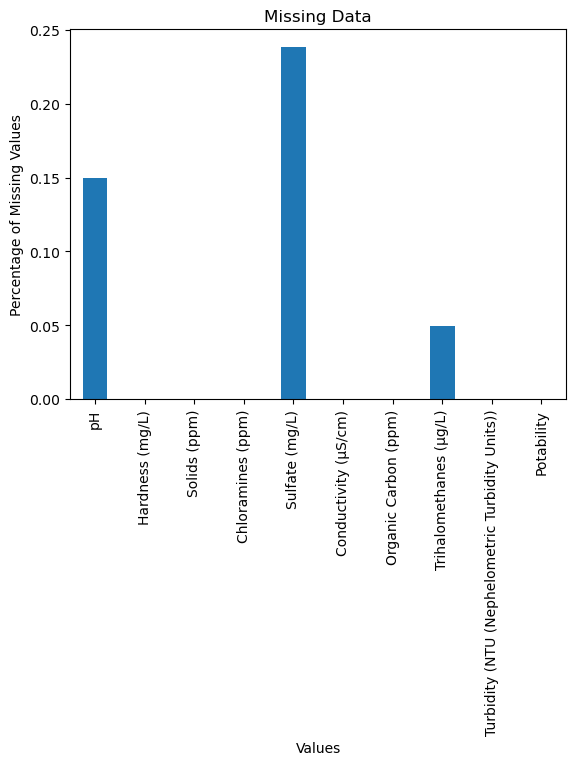

In [22]:
# Use a bar plot to get an idea of the missing data across the attributes. 
Water_Potability_Data.isnull().mean().plot.bar() 

plt.ylabel('Percentage of Missing Values') 

plt.xlabel('Values') 

plt.title('Missing Data');

The following bar plot shows Percentage of Missing Values in each column of our dataframe.

So we can see that we have a lot of missing values in the pH, Sulphate and Trihalomethane columns. 

Given this, we have the following options: 

1) Filling the missing values with the mean of the column. 

2) Padding the missing values as 0s.

However, since these values will help us decide if the water is potable or not, padding the missing data as 0s might skew the results a bit too much. Consequently, filling in NaN values with the mean/median may also cause inaccuracies, so for the purpose of this project, we simply drop all NaN values (rows that have a NaN).

In [23]:
# Drop NaN values and reset the index accordingly.
Water_Potability_Data = Water_Potability_Data.dropna().reset_index()

# New size of the dataset.
Water_Potability_Data.shape

(2011, 11)

In [24]:
# Do not need the old index, we can just drop it 
Water_Potability_Data = Water_Potability_Data.drop(columns = ['index'])

Water_Potability_Data.head()

pH  Hardness (mg/L)  Solids (ppm)  Chloramines (ppm)  \
0   8.316766       214.373394  22018.417441           8.059332   
1   9.092223       181.101509  17978.986339           6.546600   
2   5.584087       188.313324  28748.687739           7.544869   
3  10.223862       248.071735  28749.716544           7.513408   
4   8.635849       203.361523  13672.091764           4.563009   

   Sulfate (mg/L)  Conductivity (μS/cm)  Organic Carbon (ppm)  \
0      356.886136            363.266516             18.436524   
1      310.135738            398.410813             11.558279   
2      326.678363            280.467916              8.399735   
3      393.663396            283.651634             13.789695   
4      303.309771            474.607645             12.363817   

   Trihalomethanes (μg/L)  Turbidity (NTU (Nephelometric Turbidity Units))  \
0              100.341674                                         4.628771   
1               31.997993                                         4.075075   
2               54.917862                                         2.559708   
3               84.603556                                         2.672989   
4               62.798309                                         4.401425   

   Potability  
0           0  
1           0  
2           0  
3           0  
4           0

Having cleaned our data, we can highlight certain statistics such as count, mean, standard deviation etc. across the different chemical properties of the water samples (i.e. the attributes).

In [25]:
# We simply use the "describe" function to do so.
Water_Potability_Data.describe()

pH  Hardness (mg/L)  Solids (ppm)  Chloramines (ppm)  \
count  2011.000000      2011.000000   2011.000000        2011.000000   
mean      7.085990       195.968072  21917.441374           7.134338   
std       1.573337        32.635085   8642.239815           1.584820   
min       0.227499        73.492234    320.942611           1.390871   
25%       6.089723       176.744938  15615.665390           6.138895   
50%       7.027297       197.191839  20933.512750           7.143907   
75%       8.052969       216.441070  27182.587067           8.109726   
max      14.000000       317.338124  56488.672413          13.127000   

       Sulfate (mg/L)  Conductivity (μS/cm)  Organic Carbon (ppm)  \
count     2011.000000           2011.000000           2011.000000   
mean       333.224672            426.526409             14.357709   
std         41.205172             80.712572              3.324959   
min        129.000000            201.619737              2.200000   
25%        307.632511            366.680307             12.124105   
50%        332.232177            423.455906             14.322019   
75%        359.330555            482.373169             16.683049   
max        481.030642            753.342620             27.006707   

       Trihalomethanes (μg/L)  \
count             2011.000000   
mean                66.400859   
std                 16.077109   
min                  8.577013   
25%                 55.952664   
50%                 66.542198   
75%                 77.291925   
max                124.000000   

       Turbidity (NTU (Nephelometric Turbidity Units))   Potability  
count                                      2011.000000  2011.000000  
mean                                          3.969729     0.403282  
std                                           0.780346     0.490678  
min                                           1.450000     0.000000  
25%                                           3.442915     0.000000  
50%                                           3.968177     0.000000  
75%                                           4.514175     1.000000  
max                                           6.494749     1.000000

# Step 3: Exploratory Data Analysis

In this part, we hope to explore different trends in our data through visualization!

Since we are interested purely on the notion of potability, we will centralize that in our data exploration.

Given that, we can compare each chemical property with each another, to particulary highlight whether or not certain values of the concerned chemical properties are unequivocally correlating to potable or unpotable water.

First, we begin with pH values. We can compare pH values with every other chemical property of the samples, to see if certain pH values (and values of another property) correspond to potability.

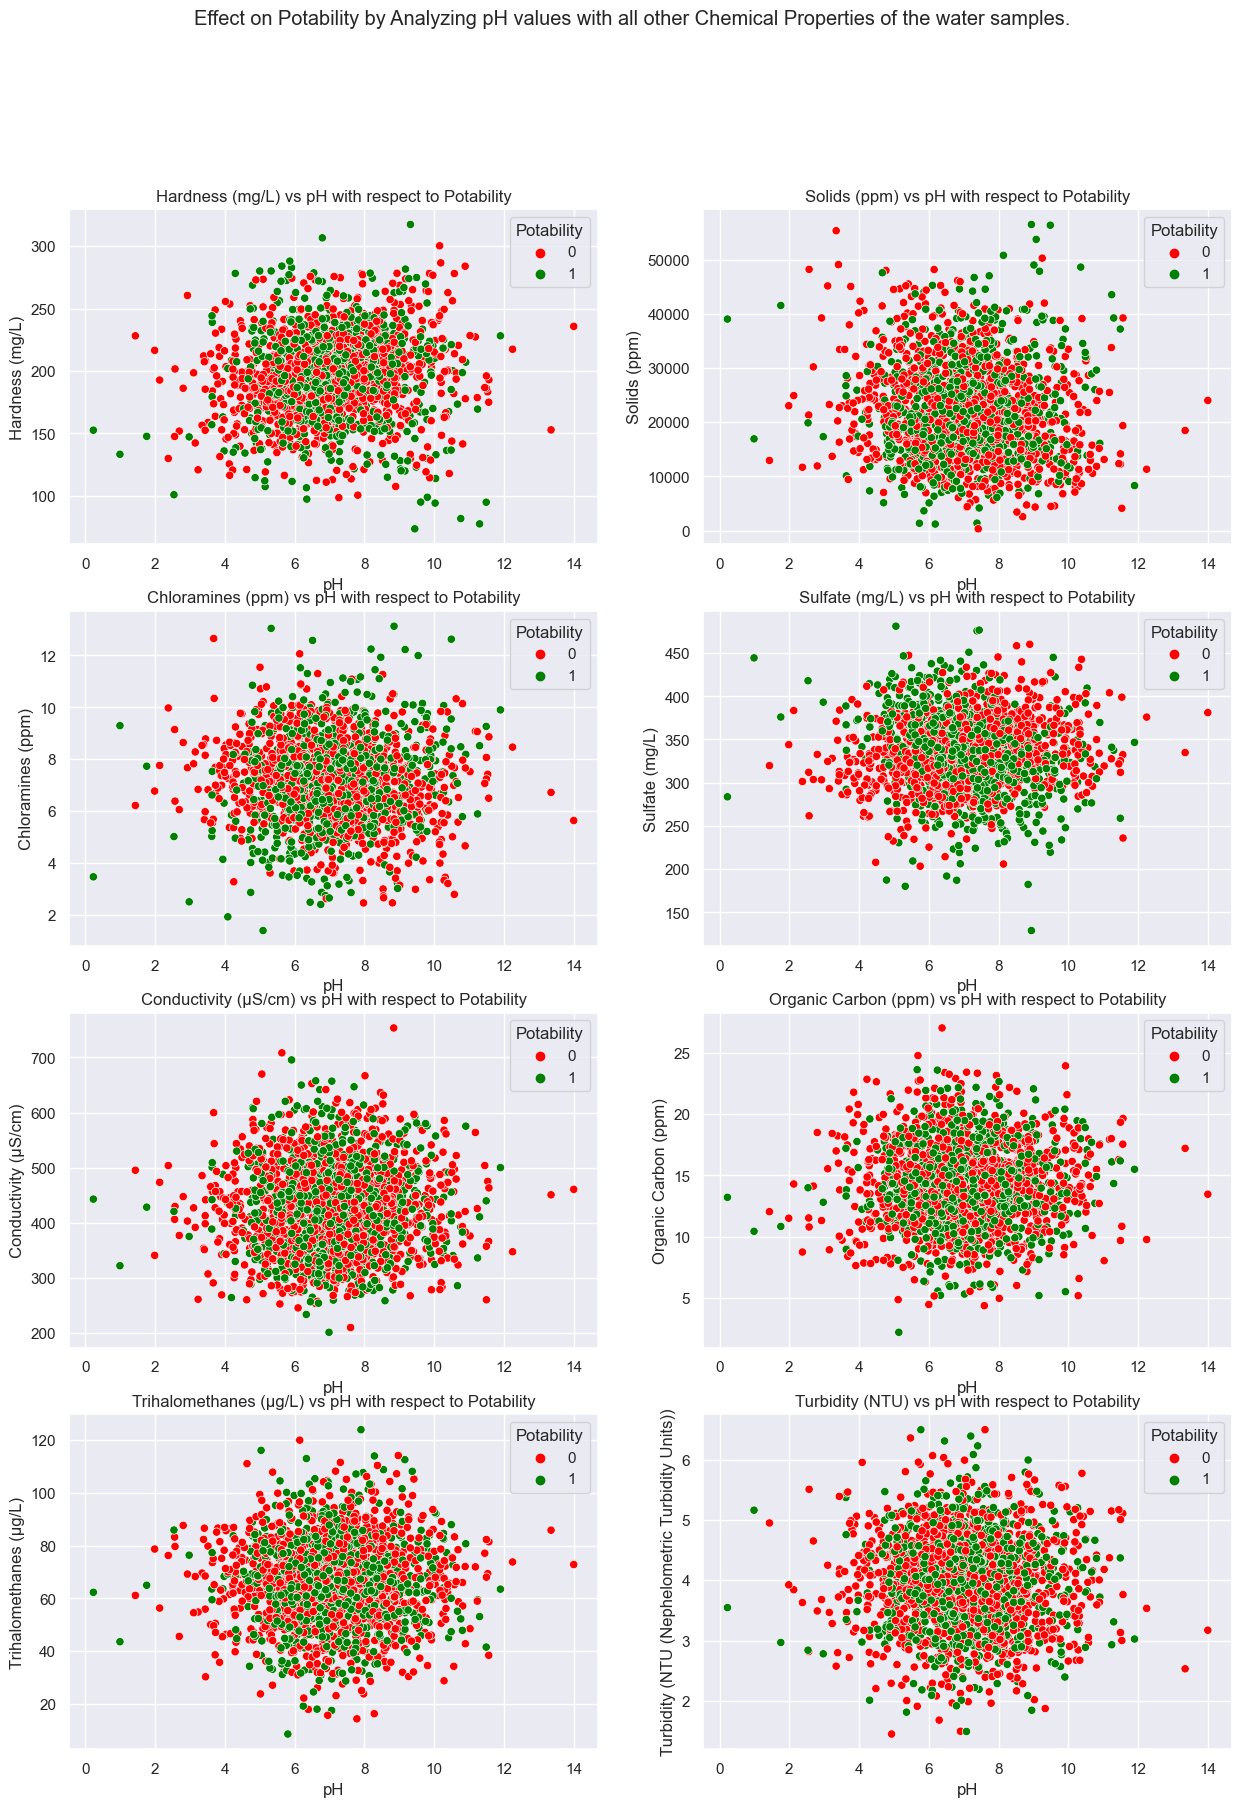

In [70]:
# Analyzing pH values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing pH values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("Hardness (mg/L) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Solids (ppm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Chloramines (ppm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Sulfate (mg/L) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs pH with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing pH values with all other chemical properties of the water samples.

****ADD CONCLUSIONS****

Next, we do the same but with Hardness.

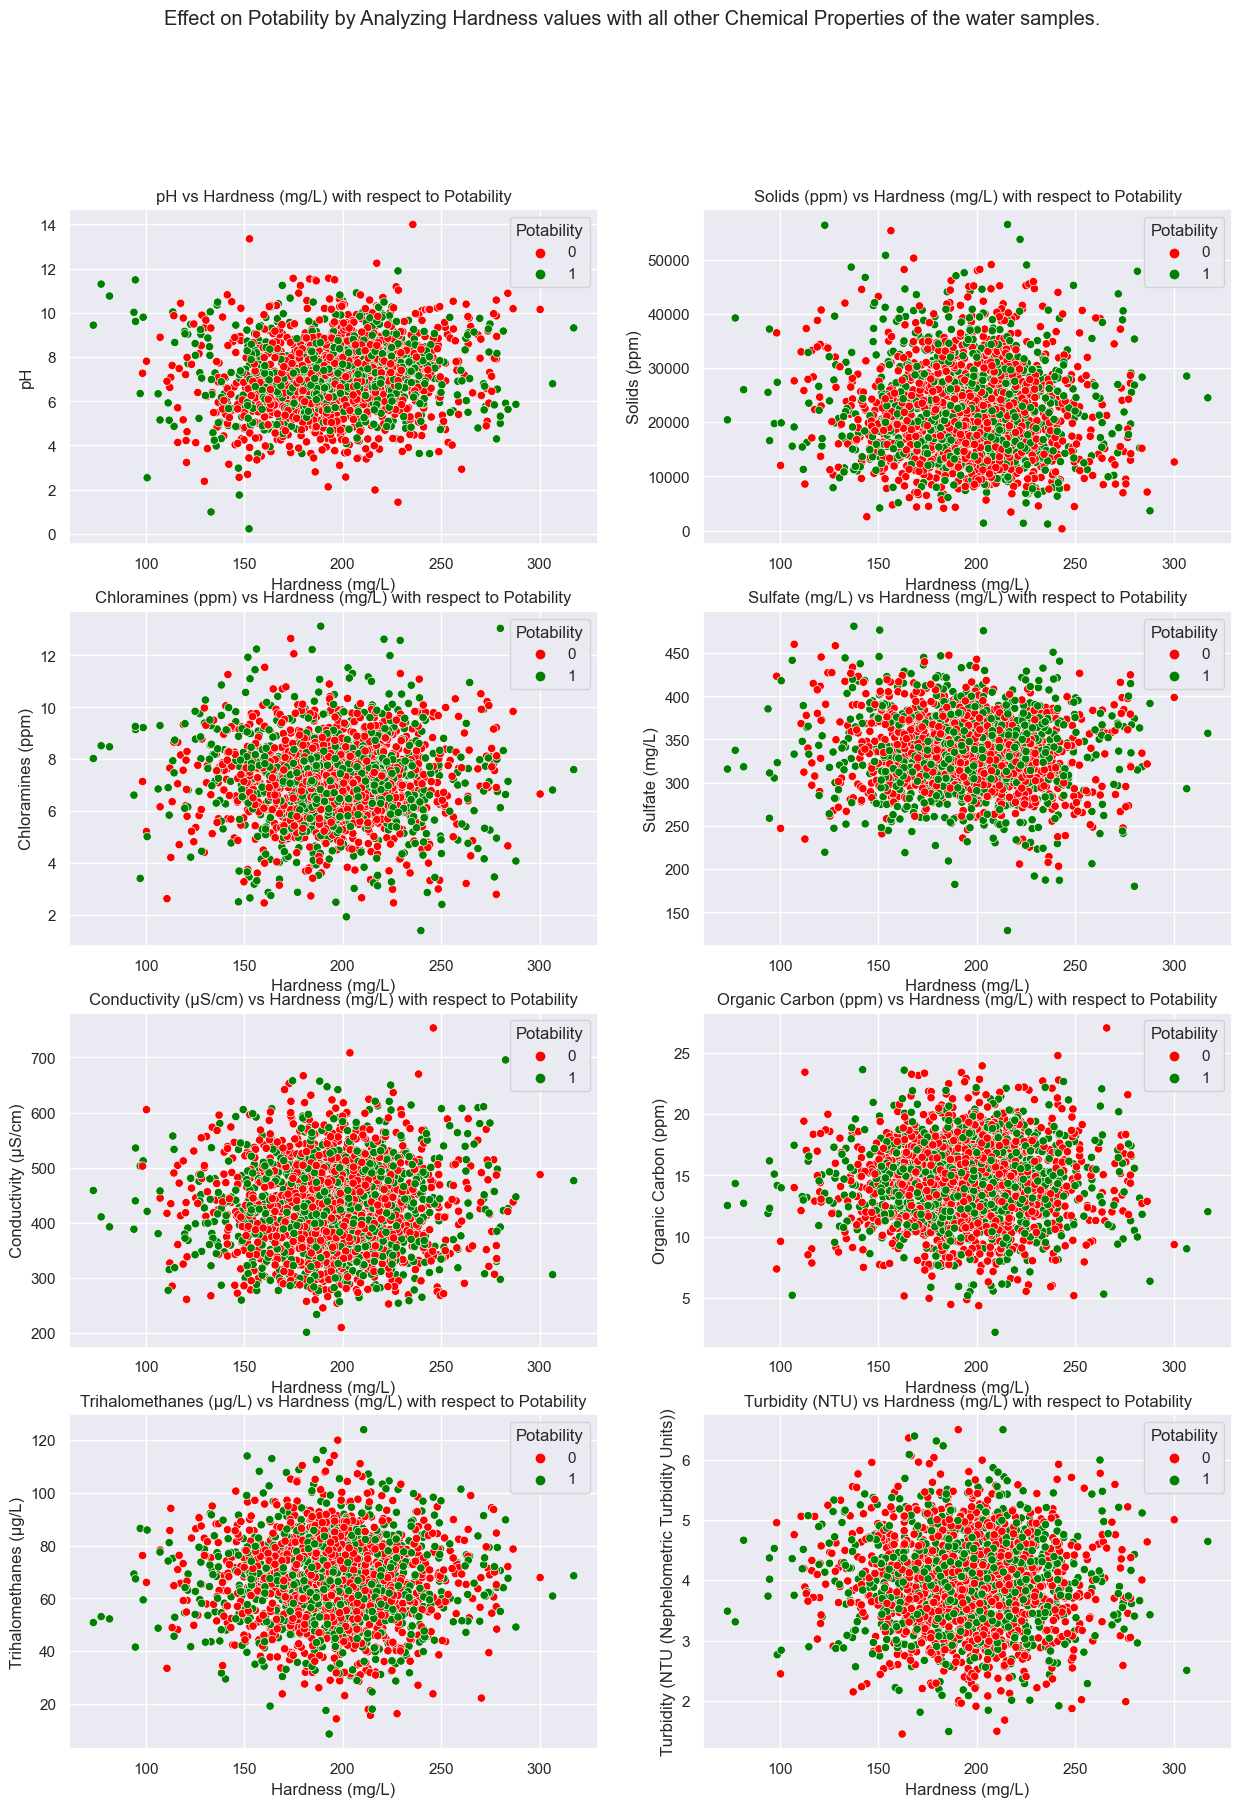

In [71]:
# Analyzing Hardness values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Hardness values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Solids (ppm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Chloramines (ppm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Sulfate (mg/L) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Hardness (mg/L) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Hardness values with all other chemical properties of the water samples.

****ADD CONCLUSIONS****
#test

Next, we do the same but with Solids.

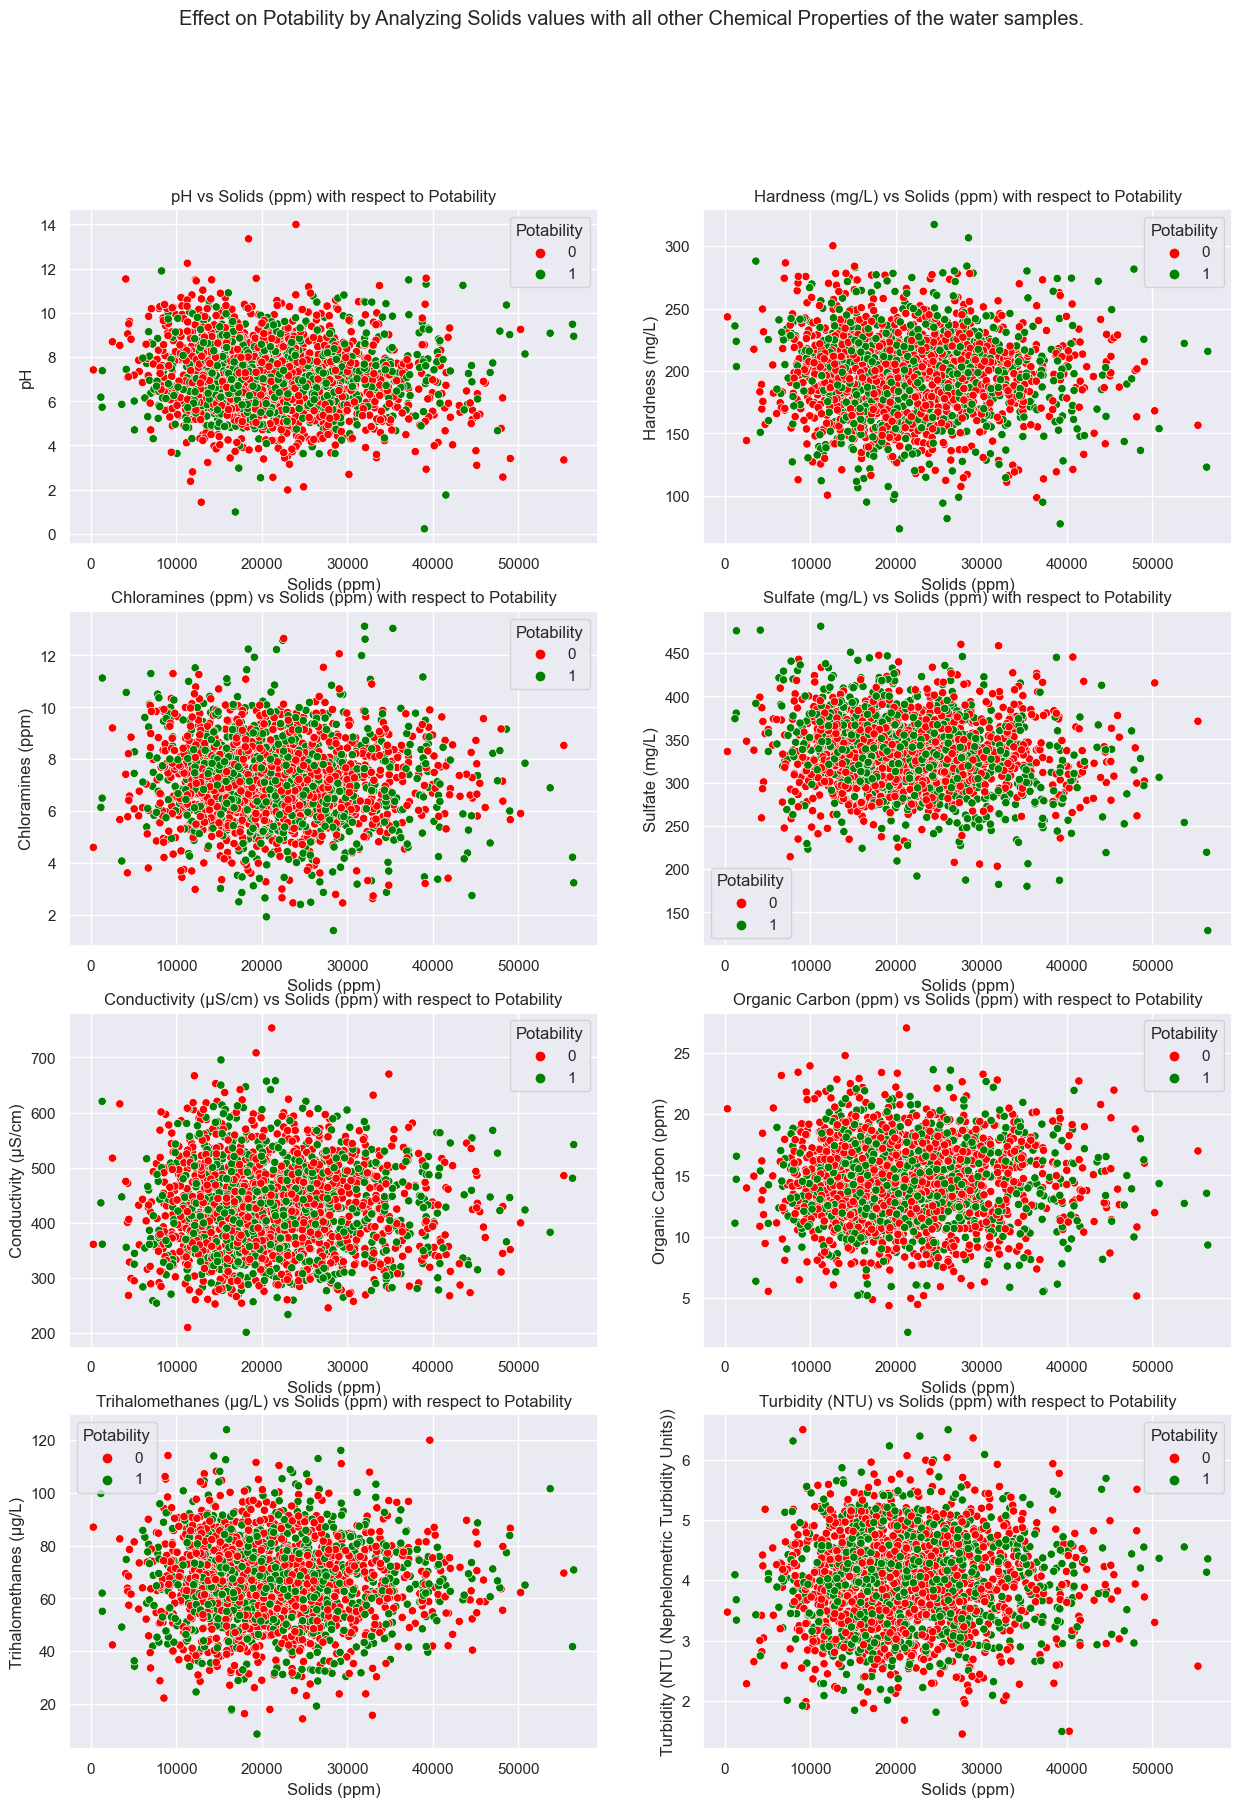

In [72]:
# Analyzing Solids values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Solids values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Chloramines (ppm) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Sulfate (mg/L) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Solids (ppm) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Solids values with all other chemical properties of the water samples.

****ADD CONCLUSIONS****

C:\Users\amartya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

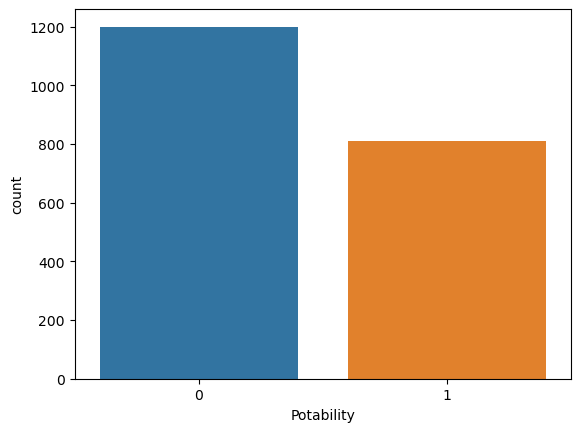

In [26]:
# Countplot for the 'Potability' column

sns.countplot(Water_Potability_Data['Potability'])

Lets visualize which values are different for potable vs non potable water using box plots

<AxesSubplot:xlabel='Potability', ylabel='Solids (ppm)'>

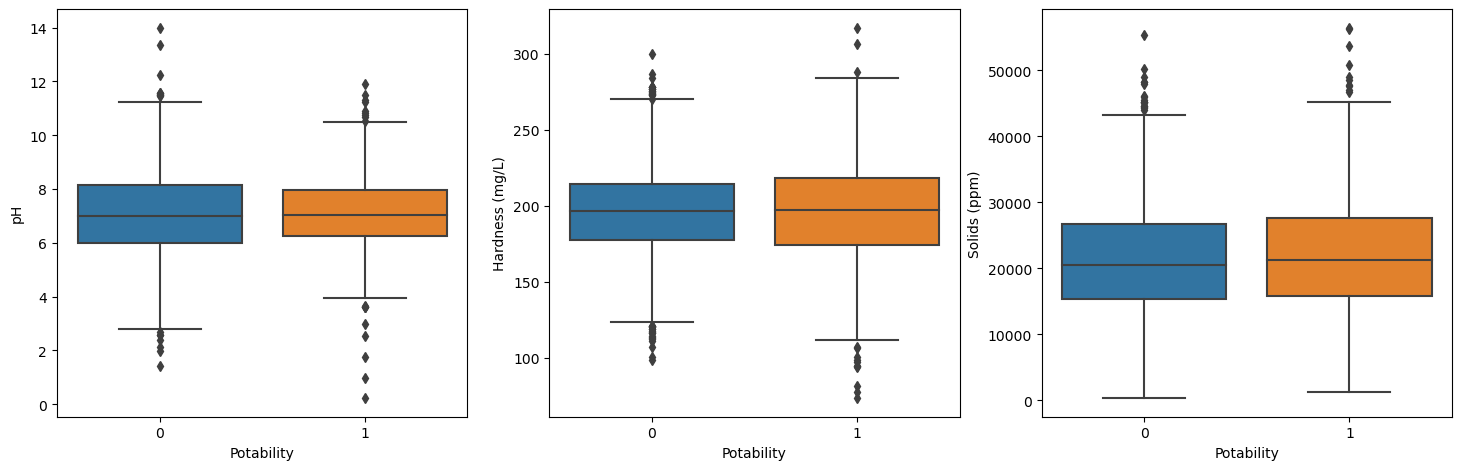

In [15]:
plt.figure(figsize = (18, 18))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Potability', y = 'pH', data = Water_Potability_Data)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'Potability', y = 'Hardness (mg/L)', data = Water_Potability_Data)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'Potability', y = 'Solids (ppm)', data = Water_Potability_Data)

<AxesSubplot:xlabel='Potability', ylabel='Conductivity (μS/cm)'>

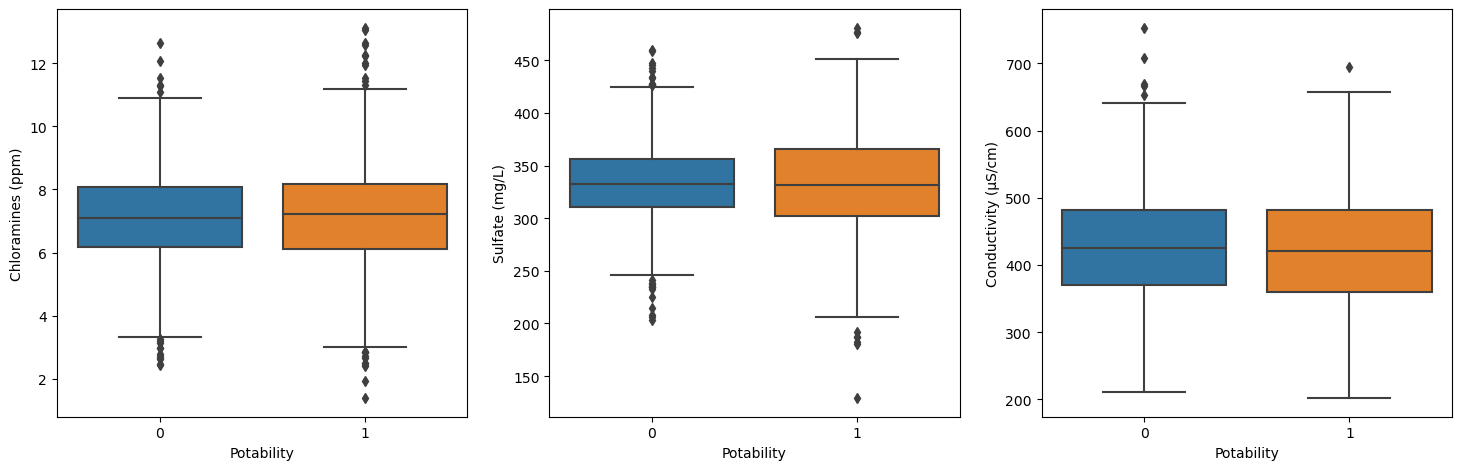

In [16]:
plt.figure(figsize = (18, 18))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Potability', y = 'Chloramines (ppm)', data = Water_Potability_Data)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'Potability', y = 'Sulfate (mg/L)', data = Water_Potability_Data)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'Potability', y = 'Conductivity (μS/cm)', data = Water_Potability_Data)

<AxesSubplot:xlabel='Potability', ylabel='Turbidity (NTU (Nephelometric Turbidity Units))'>

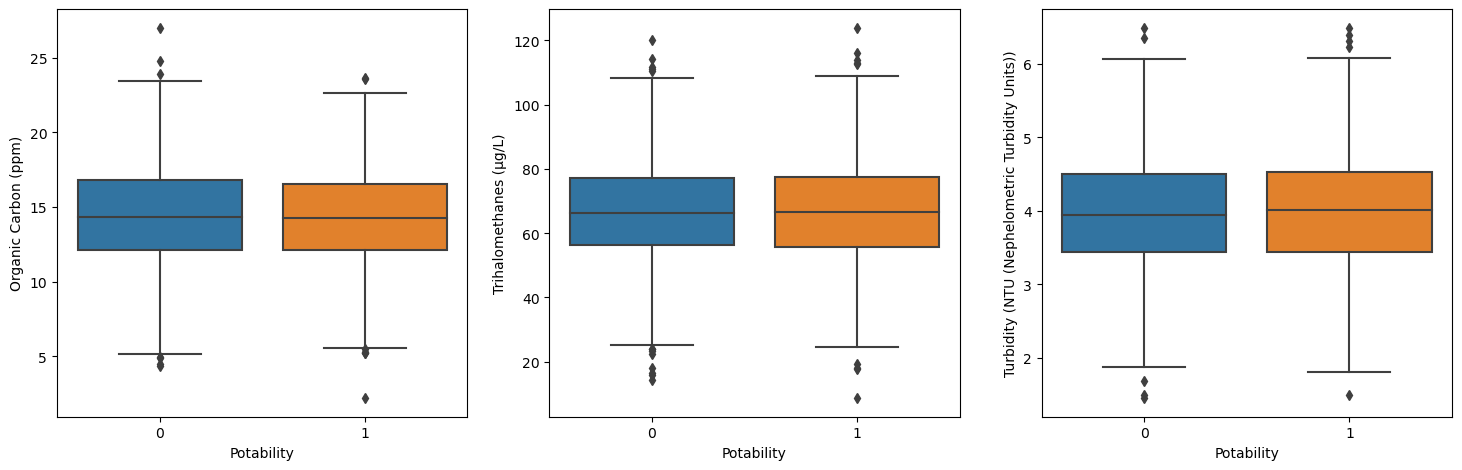

In [17]:
plt.figure(figsize = (18, 18))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Potability', y = 'Organic Carbon (ppm)', data = Water_Potability_Data)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'Potability', y = 'Trihalomethanes (μg/L)', data = Water_Potability_Data)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'Potability', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', data = Water_Potability_Data)

So, we can see that there are slight differences between the ph, sulfate, hardness and chloramine values of potable vs. non potable water, but no clear correlations
Let's use a heatmap to determine any correlations better


<AxesSubplot:>

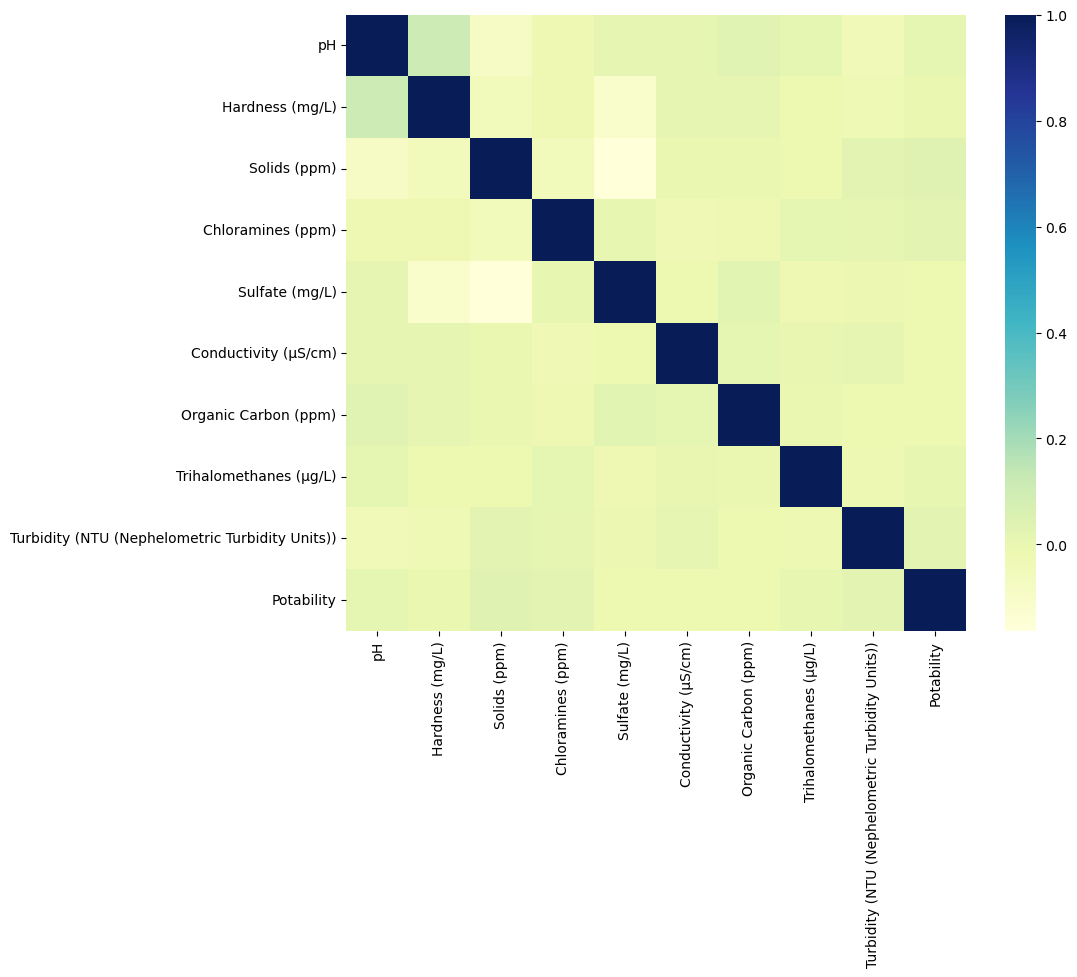

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(Water_Potability_Data.corr(), cmap="YlGnBu")

From the heatplot too we can see that there are no strong relationships between variables

# Step 4: Hypothesis Testing

All variables in the data are strongly correlated to the potability of water, i.e. all variables have a strong impact on determining whether water is potable or not

In [15]:
p_values = {}
for feature in df.columns:
    corr, p_value = scipy.stats.spearmanr(df[feature], df['Potability'])
    p_values[feature] = p_value 
p_values

{'ph': 0.5297797418282144,
 'Hardness': 0.6998145997007005,
 'Solids': 0.11633127125962607,
 'Chloramines': 0.3314569572193391,
 'Sulfate': 0.6867588303366772,
 'Conductivity': 0.42376258895464713,
 'Organic_carbon': 0.5298310038190563,
 'Trihalomethanes': 0.8685422511859388,
 'Turbidity': 0.31448141304021615,
 'Potability': 0.0}

From https://www.simplilearn.com/tutorials/statistics-tutorial/spearmans-rank-correlation - 

Spearman’s rank correlation measures the strength and direction of association between two ranked variables. It basically gives the measure of monotonicity of the relation between two variables i.e. how well the relationship between two variables could be represented using a monotonic function.

The spearman test gives a high p-value for Hardness, Sulfates, Trihalomethanes indicating a somewhat strong corelation between them and Potability


So even though some variables are corelated to potability, not all variables are, so we can reject the null hypothesis that all variables have a strong impact on the potability of water. 

# Step 4: ML 

In [16]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

We need to determine what features will be the best to use for our classifiers

In [17]:
# using hold out validation and holding out 25% of the training set for testing so training on 75%

In [18]:
X = df[['ph', 'Hardness', 'Sulfate']] # dropping potability columns since that's what we want our model to predict
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [19]:
# decision trees
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6620278330019881

In [20]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)

NameError: name 'y_pred' is not defined

In [21]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

C:\Users\amartya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5725646123260437

C:\Users\amartya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amartya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


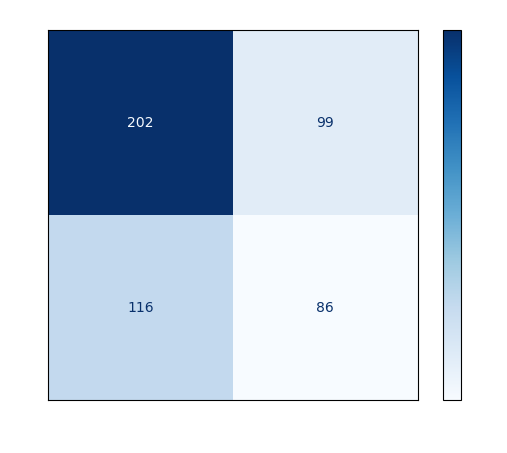

In [22]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)